In [1]:
import sys
sys.path.append('../')

In [2]:
from modules.Dataset import *
from modules import Evaluator3D, models
from modules.LossFunctions import DC_and_CE_loss

In [3]:
dataset_path = "../Data/feta_pro2/"

val = MRIDataset(FeTABalancedDistribution, "val", dataset_path, transform=None)
test = MRIDataset(FeTABalancedDistribution, "test", dataset_path, transform=None)

torch.manual_seed(0)
val_loader = torch.utils.data.DataLoader(dataset=val, batch_size=1)
test_loader = torch.utils.data.DataLoader(dataset=test, batch_size=1)

In [4]:
criterion = DC_and_CE_loss({'batch_dice': True, 'smooth': 1e-5, 'do_bg': False, 'square': False}, {})

In [5]:
model = models.UNet3D().to('cuda')
criterion = DC_and_CE_loss({'batch_dice': True, 'smooth': 1e-5, 'do_bg': False, 'square': False}, {})
model.load_state_dict(torch.load("../40_model.pth"))

<All keys matched successfully>

In [6]:
evaluator = Evaluator3D(criterion, model, (128, 128, 128), test_loader)

In [7]:
cm = evaluator.calculate_cm()

Validation : 100%|██████████████████████████████████████████████████████████████████| 10/10 [01:16<00:00,  7.66s/it]


In [10]:
cm

array([[67911231,   290431,    51785,     7553,        0,     4877,
               0,        0],
       [  438241,  4111055,   315791,    20718,     5256,    33533,
            3054,    21733],
       [   76266,   278043,  1868297,   337764,     3452,      192,
            8114,     1527],
       [   12192,    42326,   414578,  5568081,   126444,     1411,
           94143,     4447],
       [      15,    22548,     1363,    66785,  1180308,      615,
           12634,     1917],
       [    5445,    41347,       59,       25,     1387,   370363,
               0,     6557],
       [     181,     8094,     1549,    47389,    21827,        0,
          657850,    26372],
       [     670,    18617,     1432,     1744,     2305,     2428,
           12957,   204918]], dtype=int64)

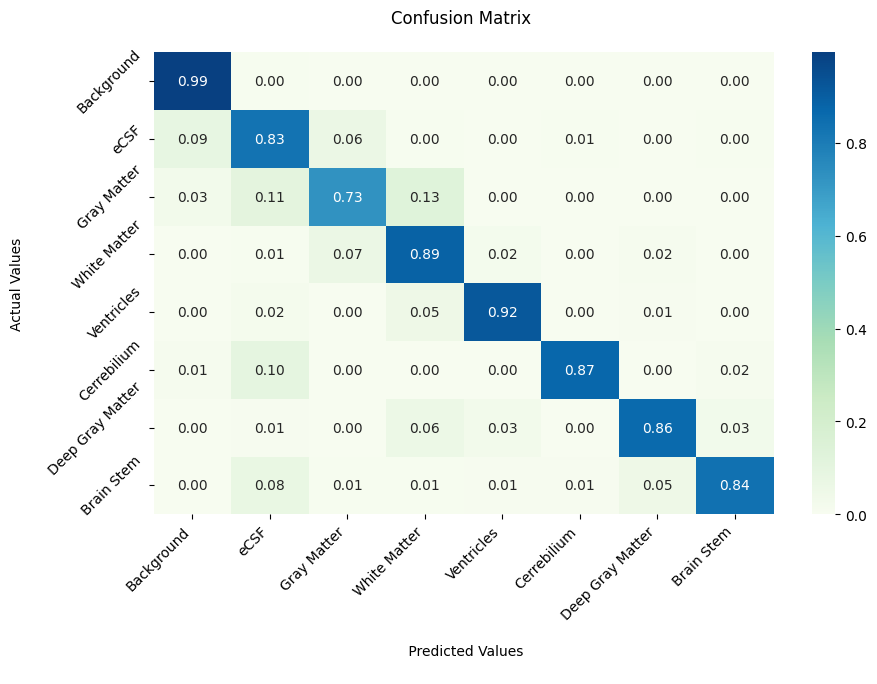

In [9]:
evaluator.plot_confusion_matrix()